In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

__Import the libraries__

In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

In [7]:
train = pd.read_csv('Train.csv')
train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


__Checking for Datatypes__

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


**Checking for Descriptive statistics using the Describe method**

In [9]:
train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,8068,NaN,NaN,NaN,463479,2595.38,458982,461241,463472,465744,467974
Gender,8068,2,Male,4417,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ever_Married,7928,2,Yes,4643,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,8068,NaN,NaN,NaN,43.4669,16.7117,18,30,40,53,89
Graduated,7990,2,Yes,4968,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Profession,7944,9,Artist,2516,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Work_Experience,7239,NaN,NaN,NaN,2.64166,3.40676,0,0,1,4,14
Spending_Score,8068,3,Low,4878,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Family_Size,7733,NaN,NaN,NaN,2.85012,1.53141,1,2,3,4,9
Var_1,7992,7,Cat_6,5238,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Checking for column names**

In [10]:
print(train.columns.to_list())

['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession', 'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1', 'Segmentation']


**Exploratory Data Analysis**

In [11]:
# check for segmentation columns
train.groupby('Segmentation')[[ 'Age','Work_Experience','Family_Size', 'Var_1']].agg('mean')

,Age,Work_Experience,Family_Size
Segmentation,,,
A,44.924949,2.874578,2.439531
B,48.200215,2.378151,2.696970
C,49.144162,2.240771,2.974559
D,33.390212,3.021717,3.232624


<AxesSubplot:xlabel='Segmentation'>

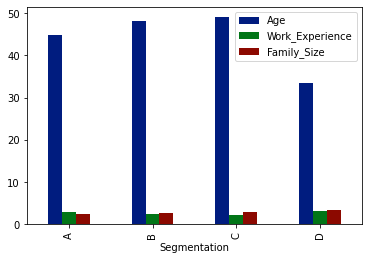

In [12]:
#plot
plt.style.use('seaborn-dark-palette')
train.groupby('Segmentation')[[ 'Age','Work_Experience','Family_Size', 'Var_1']].agg('mean').plot(kind = 'bar')

In [13]:
# by Gender
train.groupby('Gender')[['Age','Work_Experience','Family_Size']].agg('mean')

,Age,Work_Experience,Family_Size
Gender,,,
Female,42.911531,2.865449,2.755325
Male,43.925968,2.455741,2.927448


<AxesSubplot:ylabel='Gender'>

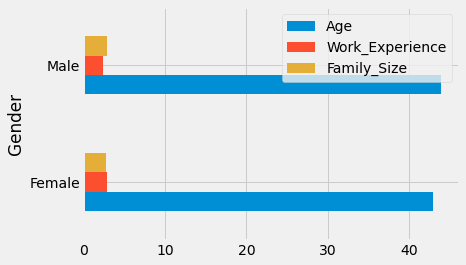

In [14]:
plt.style.use('fivethirtyeight')
train.groupby('Gender')[['Age','Work_Experience','Family_Size']].agg('mean').plot(kind = 'barh')

In [15]:
# we will check for profession by gender
train.groupby(['Profession','Gender'])[['Gender']].count()

Gender
Profession    Gender        
Artist        Female    1213
              Male      1303
Doctor        Female     304
              Male       384
Engineer      Female     559
              Male       140
Entertainment Female     253
              Male       696
Executive     Female      32
              Male       567
Healthcare    Female     557
              Male       775
Homemaker     Female     203
              Male        43
Lawyer        Female     307
              Male       316
Marketing     Female     164
              Male       128

In [16]:
# check the spending score by Gender
train.groupby(['Gender','Spending_Score'])[['Spending_Score']].count()

Spending_Score
Gender Spending_Score                
Female Average                    831
       High                       490
       Low                       2330
Male   Average                   1143
       High                       726
       Low                       2548

<AxesSubplot:ylabel='Gender,Spending_Score'>

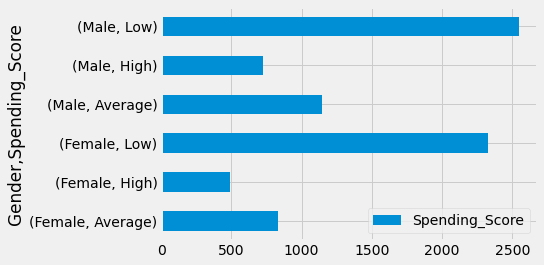

In [17]:
train.groupby(['Gender','Spending_Score'])[['Spending_Score']].count().plot(kind = 'barh')

__Checking for missing values__

In [18]:
train.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [19]:
# there are missing values in some of the columns so we can drop them 
train.dropna(axis=0,inplace=True)
train.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

__Checking for correlation__

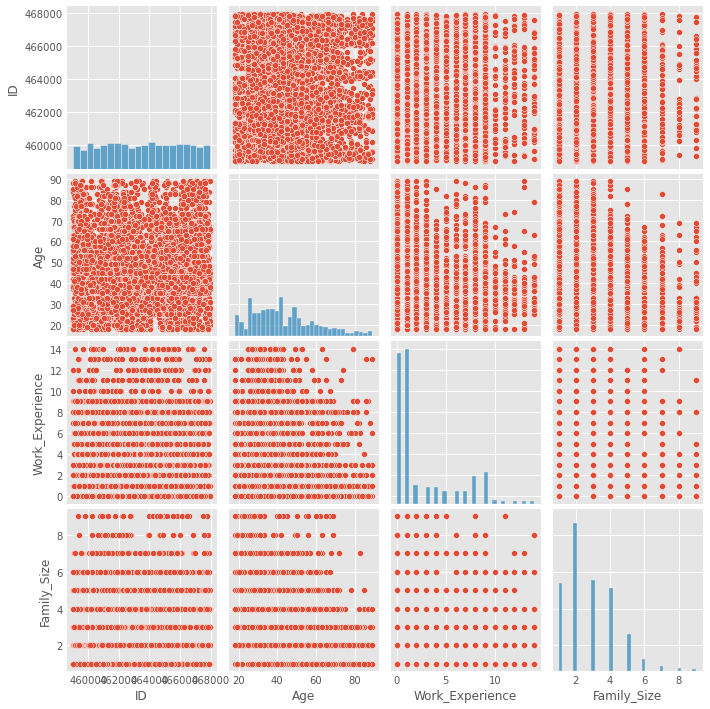

In [20]:
plt.style.use('ggplot')
sns.pairplot(train)

<AxesSubplot:>

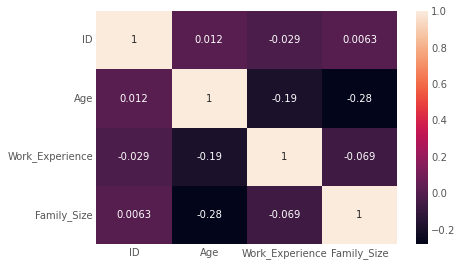

In [21]:
sns.heatmap(train.corr(),annot = True)

__Creating Dummy Variables__

In [22]:
cat = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']
df_dummies = pd.get_dummies(train,columns=cat)
print(df_dummies.columns.tolist())

['ID', 'Age', 'Work_Experience', 'Family_Size', 'Segmentation', 'Gender_Female', 'Gender_Male', 'Ever_Married_No', 'Ever_Married_Yes', 'Graduated_No', 'Graduated_Yes', 'Profession_Artist', 'Profession_Doctor', 'Profession_Engineer', 'Profession_Entertainment', 'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker', 'Profession_Lawyer', 'Profession_Marketing', 'Spending_Score_Average', 'Spending_Score_High', 'Spending_Score_Low', 'Var_1_Cat_1', 'Var_1_Cat_2', 'Var_1_Cat_3', 'Var_1_Cat_4', 'Var_1_Cat_5', 'Var_1_Cat_6', 'Var_1_Cat_7']


**Using Label encoder to encode Segmentation column**

In [23]:
le = LabelEncoder()
df_dummies['Segmentation'] = le.fit_transform(df_dummies['Segmentation'])


/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


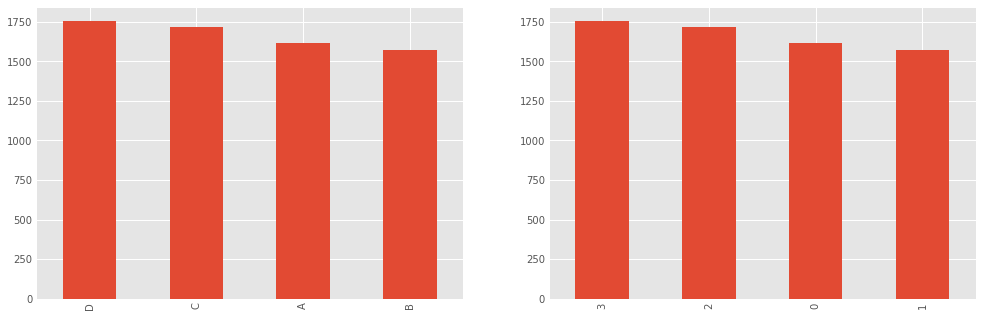

In [24]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
train['Segmentation'].value_counts().plot(kind = 'bar')
plt.subplot(1,2,2)
df_dummies['Segmentation'].value_counts().plot(kind = 'bar')
plt.show()

__Divide the data into train and test set__

In [25]:
X = df_dummies.drop(['Segmentation','ID'],axis = 1)
y = df_dummies['Segmentation']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.20)

**Decision Tree**

In [26]:
dct = DecisionTreeClassifier()
dct.fit(X_train,y_train)
y_pred_dct = dct.predict(X_test)
print(f"The accuracy score for Decision Tree is {(accuracy_score(y_test,y_pred_dct)*100).round(2)} %")

The accuracy score for Decision Tree is 44.41 %


__Random Forest__

In [27]:
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
print(f"The accuracy score for Random Forest is {(accuracy_score(y_test,y_pred_rf)*100).round(2)}")

The accuracy score for Random Forest is 47.94


**Using Cross Validation**

In [28]:
# For decision tree
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dct, X, y, cv=10)
print(f"10-fold cross validation average accuracy: {(scores.mean()*100).round(3)} %")

10-fold cross validation average accuracy: 43.242 %


In [29]:
# for Random forest
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, X, y, cv=10)
print(f"10-fold cross validation average accuracy: {scores.mean().round(3)}")

10-fold cross validation average accuracy: 0.485


In [32]:
# max score
print(f"10-fold cross validation max accuracy: {(scores.max() *100).round(2)} %")

10-fold cross validation max accuracy: 51.95 %


In [33]:
test = pd.read_csv("Test.csv")
test.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,A


In [34]:
# shape
print(train.shape)
print(test.shape)

(6665, 11)
(2627, 11)


**Check for missing values in test data**

In [35]:
test.isnull().sum()

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
Segmentation         0
dtype: int64

In [36]:
# drop missing values
test.dropna(inplace = True)
test.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [37]:
cat = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']
df_dummies_test = pd.get_dummies(test,columns=cat)
print(df_dummies_test.columns.tolist())

['ID', 'Age', 'Work_Experience', 'Family_Size', 'Segmentation', 'Gender_Female', 'Gender_Male', 'Ever_Married_No', 'Ever_Married_Yes', 'Graduated_No', 'Graduated_Yes', 'Profession_Artist', 'Profession_Doctor', 'Profession_Engineer', 'Profession_Entertainment', 'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker', 'Profession_Lawyer', 'Profession_Marketing', 'Spending_Score_Average', 'Spending_Score_High', 'Spending_Score_Low', 'Var_1_Cat_1', 'Var_1_Cat_2', 'Var_1_Cat_3', 'Var_1_Cat_4', 'Var_1_Cat_5', 'Var_1_Cat_6', 'Var_1_Cat_7']


In [38]:
le = LabelEncoder()
df_dummies_test['Segmentation_label'] = le.fit_transform(df_dummies_test['Segmentation'])

In [39]:
df_dummies_test['Segmentation_label']

0       1
1       0
3       1
5       2
6       3
       ..
2621    3
2622    1
2623    0
2625    2
2626    0
Name: Segmentation_label, Length: 2154, dtype: int64

**Fitting the model on test data**

In [40]:
X_test_new = df_dummies_test.drop(['Segmentation','ID','Segmentation_label'],axis = 1)
y_test_new = df_dummies_test['Segmentation_label']
y_pred_new = rf.predict(X_test_new)
y_new = pd.DataFrame({'Actual':y_test_new,'Predicted': y_pred_new })
y_new

,Actual,Predicted
0,1,0
1,0,0
3,1,2
5,2,2
6,3,0
...,...,...
2621,3,0
2622,1,3
2623,0,0
2625,2,1


In [41]:
y_new['outcome'] = np.where( y_new['Actual'] == y_new['Predicted'] , 'Correct', 'Incorrect')

In [42]:
y_new

,Actual,Predicted,outcome
0,1,0,Incorrect
1,0,0,Correct
3,1,2,Incorrect
5,2,2,Correct
6,3,0,Incorrect
...,...,...,...
2621,3,0,Incorrect
2622,1,3,Incorrect
2623,0,0,Correct
2625,2,1,Incorrect


In [43]:
# Random forest is the best performing model which gives an accuracy of 52.47% using cross validation.